# Analysing text from WallStreetBets

### **Part 1a: PRAW: The Python Reddit API Wrapper**

In [ ]:
# Import python library PRAW, check to see if it is already installed, if not, install and load
try:
    import praw
except ImportError:
    %pip install praw
    import praw

In [ ]:
# Input your credentials here

reddit = praw.Reddit(
    client_id="PtaxnbDTyNni7MpvVLrPlw",
    client_secret="SYzNGgKAh-2q7g8X_dxSc5WAdz5aBg",
    user_agent="testscript by u/instructor",
    check_for_async=False
)



#### **Hot/Trending 10 Submissions From The Past Week From ```r/wallstreetbets```**

In [ ]:
for submission in reddit.subreddit("wallstreetbets").top(time_filter="week", limit=10):
    print(submission.title)
    print(submission.url)


You know your calls are cooked when the board comes out
https://i.redd.it/u4v57pvlehse1.png
China Imposes 34% Tariffs on All US Imports
https://www.bloomberg.com/news/articles/2025-04-04/china-imposes-34-tariffs-on-all-us-imports-as-retaliation
Just a reminder…
https://i.redd.it/lyxfp9nrakse1.jpeg
China, Japan, South Korea will jointly respond to US tariffs, Chinese state media says
https://www.reddit.com/r/wallstreetbets/comments/1jo6v9m/china_japan_south_korea_will_jointly_respond_to/
TARIFF CHART RELEASED
https://i.redd.it/w441mv2gihse1.jpeg
Hooters files for bankruptcy
https://www.cnn.com/2025/03/31/business/hooters-restaurant-bankruptcy?cid=ios_app
Goldman Sachs sees Trump tariffs spiking inflation, stunting growth and raising recession risks
https://www.cnbc.com/2025/03/30/tariffs-to-spike-inflation-stunt-growth-and-raise-recession-risks-goldman-says-.html
What buying the dip feels like
https://v.redd.it/z6ipc38zamre1
This morning NASDAQ dropped more than during Lehman Monday
htt

### **Part 1b: Extracting comments with PRAW**

In [ ]:
# We first create a submission object
url = "https://www.reddit.com/r/wallstreetbets/comments/1jo6v9m/china_japan_south_korea_will_jointly_respond_to/"
submission = reddit.submission(url=url)

In [ ]:
document=[]
submission.comments.replace_more(limit=20)
for top_level_comment in submission.comments:
        document.append(top_level_comment.body)

In [ ]:
document

['\n**User Report**| | | |\n:--|:--|:--|:--\n**Total Submissions** | 1 | **First Seen In WSB** | 1 month ago\n**Total Comments** | 101 | **Previous Best DD** | \n**Account Age** | 4 months | | \n\n[**Join WSB Discord**](http://discord.gg/wsbverse)',
 'Bro got china and japan working together',
 'holy lord, i never expected them cooperating on anything in my lifetime',
 'What even more absurd scenario is left at this point? Israel and Palestine announcing they’ll jointly respond against tariffs?',
 'Wake up babe new Greater East Asia Co-Prosperity Sphere just dropped',
 "this year Nobel peace prize winner for sure ! can't believe he did the impossible !",
 'https://preview.redd.it/g9ybo2p0w1se1.jpeg?width=579&format=pjpg&auto=webp&s=176ad5f201d56375f24082b2d044588f9d8626ba',
 'Our key allies in Asia aligning with our key rival in Asia. \n\nCool. Super. Great.',
 'At least mango is uniting the world, even if it is against the US.',
 'You know you’re cooked when you’ve managed to get thes

In [ ]:
#Let's put this into a dataframe
author=[]
submission.comments.replace_more(limit=5)
for top_level_comment in submission.comments:
        author.append(top_level_comment.author)

import pandas as pd

df = pd.DataFrame(list(zip(author, document)),
               columns =['Author', 'Comment'])

In [ ]:
df

,Author,Comment
0,VisualMod,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...
1,ForsakenRacism,Bro got china and japan working together
2,MyCactusTeacher,"holy lord, i never expected them cooperating o..."
3,HighwayExotic2808,What even more absurd scenario is left at this...
4,Ok-Swimmer-2634,Wake up babe new Greater East Asia Co-Prosperi...
...,...,...
543,Xaphnir,"Great job, Trump, really sticking it to the CC..."
544,RustJigsaw,"Yeah, no. Seems like Reddit echo chamber gonna..."
545,czhDavid,Do you sometimes think he is secretly a genius...
546,jeremycrackcorn,"""Chinese state media says..."" Is the only part..."


In [ ]:
# Save dataframe in csv format to computer

df.to_csv('praw_output.csv')


## **Part 2: Text analysis**


In [ ]:
display(df)

,Author,Comment
0,VisualMod,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...
1,ForsakenRacism,Bro got china and japan working together
2,MyCactusTeacher,"holy lord, i never expected them cooperating o..."
3,HighwayExotic2808,What even more absurd scenario is left at this...
4,Ok-Swimmer-2634,Wake up babe new Greater East Asia Co-Prosperi...
...,...,...
543,Xaphnir,"Great job, Trump, really sticking it to the CC..."
544,RustJigsaw,"Yeah, no. Seems like Reddit echo chamber gonna..."
545,czhDavid,Do you sometimes think he is secretly a genius...
546,jeremycrackcorn,"""Chinese state media says..."" Is the only part..."


In [ ]:
# we will pick one of the rows as our example sentence for the following demonstrations.
example = df['Comment'].to_string()
type(example)

str

### **Part 2a: Preprocessing**

### **Case normalization**


In [ ]:
# Import python library truecase, check to see if it is already installed, if not, install and load
try:
    import truecase
    import nltk
    nltk.download('punkt_tab')
except ImportError:
    %pip install truecase
    import truecase



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# example
print(truecase.get_true_case('bro got china and japan working together'))

Bro got China and Japan working together


In [ ]:
print(truecase.get_true_case(example))

0 \N * * user report * * | | | |\N:--|:--|:--|:--\N * * t...1 Bro got China and Japan working together 2 Holy Lord, I never expected them cooperating O...3 what even more absurd scenario is left at this...4 wake up Babe new greater East Asia Co-Prosperi...5 this year Nobel peace prize winner for sure!...6 Https: //Preview.Redd.It/G9Ybo2P0W1Se1.Jpeg? WID...7 our key allies in Asia Aligning with our key R...8 at least Mango is uniting the world, even if I...9 you know you ’ re cooked when you ’ ve managed to...10 so so tired of endless red days . What even is...11 Https: //Preview.Redd.It/Cvzkyv5Fx1Se1.Jpeg? WID...12 guy really thinks we can just take on the Enti...13 [removed] 14 us is really doin the whole Yosemite Sam piano...15 Wow, America messed up trade relations so bad...16 us is taking the old Argentina route and Killi...17 liberating the world from the us market is Wha...18 we unified Asia!!!! 🇺🇸 🇺🇸 💪🏻 🧨 💥 19 Ah, yes . The "winning" we were Promised.\N\Nht...20 that's how Fucke

### **Removing unwanted characters and numbers**


In [ ]:
import re
clean_example = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", example)
clean_example = re.sub(r"\W+", " ", clean_example)
clean_example

'0 n User Report n n T 1 Bro got china and japan working together 2 holy lord i never expected them cooperating o 3 What even more absurd scenario is left at this 4 Wake up babe new Greater East Asia Co Prosperi 5 this year Nobel peace prize winner for sure 6 https preview redd it g9ybo2p0w1se1 jpeg wid 7 Our key allies in Asia aligning with our key r 8 At least mango is uniting the world even if i 9 You know you re cooked when you ve managed to 10 So so tired of endless red days What even is 11 https preview redd it cvzkyv5fx1se1 jpeg wid 12 Guy really thinks we can just take on the enti 13 removed 14 US is really doin the whole Yosemite Sam piano 15 Wow America messed up trade relations so bad 16 US is taking the old Argentina route and killi 17 Liberating the world from the US market is wha 18 We unified Asia 19 Ah yes The winning we were promised n nht 20 That s how fucked up things are getting when t 21 Jesus Christ wtf has the US done 22 Remember last year when every economic exp

### **Tokenization**
Tokenization splits sentences into individual words (aka ***tokens***).


In [ ]:
# Import python library nltk, check to see if it is already installed, if not, install and load
try:
    import nltk
except ImportError:
    %pip install nltk
    import nltk

nltk.download('punkt') # you only need to run this line once on your computer and it will be saved to your computer.

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokens = word_tokenize(clean_example)
print(tokens)

['0', 'n', 'User', 'Report', 'n', 'n', 'T', '1', 'Bro', 'got', 'china', 'and', 'japan', 'working', 'together', '2', 'holy', 'lord', 'i', 'never', 'expected', 'them', 'cooperating', 'o', '3', 'What', 'even', 'more', 'absurd', 'scenario', 'is', 'left', 'at', 'this', '4', 'Wake', 'up', 'babe', 'new', 'Greater', 'East', 'Asia', 'Co', 'Prosperi', '5', 'this', 'year', 'Nobel', 'peace', 'prize', 'winner', 'for', 'sure', '6', 'https', 'preview', 'redd', 'it', 'g9ybo2p0w1se1', 'jpeg', 'wid', '7', 'Our', 'key', 'allies', 'in', 'Asia', 'aligning', 'with', 'our', 'key', 'r', '8', 'At', 'least', 'mango', 'is', 'uniting', 'the', 'world', 'even', 'if', 'i', '9', 'You', 'know', 'you', 're', 'cooked', 'when', 'you', 've', 'managed', 'to', '10', 'So', 'so', 'tired', 'of', 'endless', 'red', 'days', 'What', 'even', 'is', '11', 'https', 'preview', 'redd', 'it', 'cvzkyv5fx1se1', 'jpeg', 'wid', '12', 'Guy', 'really', 'thinks', 'we', 'can', 'just', 'take', 'on', 'the', 'enti', '13', 'removed', '14', 'US', 'is

### **n-grams**
n-grams return sequences of *n* adjacent words.  It provides context around words for some models.

In [ ]:
from nltk.util import ngrams

#2-gram example:
grams = ngrams(tokens, 2)
for gram in grams:
        print(gram)

('0', 'n')
('n', 'User')
('User', 'Report')
('Report', 'n')
('n', 'n')
('n', 'T')
('T', '1')
('1', 'Bro')
('Bro', 'got')
('got', 'china')
('china', 'and')
('and', 'japan')
('japan', 'working')
('working', 'together')
('together', '2')
('2', 'holy')
('holy', 'lord')
('lord', 'i')
('i', 'never')
('never', 'expected')
('expected', 'them')
('them', 'cooperating')
('cooperating', 'o')
('o', '3')
('3', 'What')
('What', 'even')
('even', 'more')
('more', 'absurd')
('absurd', 'scenario')
('scenario', 'is')
('is', 'left')
('left', 'at')
('at', 'this')
('this', '4')
('4', 'Wake')
('Wake', 'up')
('up', 'babe')
('babe', 'new')
('new', 'Greater')
('Greater', 'East')
('East', 'Asia')
('Asia', 'Co')
('Co', 'Prosperi')
('Prosperi', '5')
('5', 'this')
('this', 'year')
('year', 'Nobel')
('Nobel', 'peace')
('peace', 'prize')
('prize', 'winner')
('winner', 'for')
('for', 'sure')
('sure', '6')
('6', 'https')
('https', 'preview')
('preview', 'redd')
('redd', 'it')
('it', 'g9ybo2p0w1se1')
('g9ybo2p0w1se1', 'j

In [ ]:
#3-gram example:
grams = ngrams(tokens, 3)
for gram in grams:
        print(gram)

('0', 'n', 'User')
('n', 'User', 'Report')
('User', 'Report', 'n')
('Report', 'n', 'n')
('n', 'n', 'T')
('n', 'T', '1')
('T', '1', 'Bro')
('1', 'Bro', 'got')
('Bro', 'got', 'china')
('got', 'china', 'and')
('china', 'and', 'japan')
('and', 'japan', 'working')
('japan', 'working', 'together')
('working', 'together', '2')
('together', '2', 'holy')
('2', 'holy', 'lord')
('holy', 'lord', 'i')
('lord', 'i', 'never')
('i', 'never', 'expected')
('never', 'expected', 'them')
('expected', 'them', 'cooperating')
('them', 'cooperating', 'o')
('cooperating', 'o', '3')
('o', '3', 'What')
('3', 'What', 'even')
('What', 'even', 'more')
('even', 'more', 'absurd')
('more', 'absurd', 'scenario')
('absurd', 'scenario', 'is')
('scenario', 'is', 'left')
('is', 'left', 'at')
('left', 'at', 'this')
('at', 'this', '4')
('this', '4', 'Wake')
('4', 'Wake', 'up')
('Wake', 'up', 'babe')
('up', 'babe', 'new')
('babe', 'new', 'Greater')
('new', 'Greater', 'East')
('Greater', 'East', 'Asia')
('East', 'Asia', 'Co')
(

### **Removing Stop-words**


In [ ]:
nltk.download("stopwords") # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.corpus import stopwords

clean_tokens = nltk.word_tokenize(clean_example)
filtered_words = [word for word in clean_tokens if word not in stopwords.words('english')]
filtered_words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['0',
 'n',
 'User',
 'Report',
 'n',
 'n',
 'T',
 '1',
 'Bro',
 'got',
 'china',
 'japan',
 'working',
 'together',
 '2',
 'holy',
 'lord',
 'never',
 'expected',
 'cooperating',
 '3',
 'What',
 'even',
 'absurd',
 'scenario',
 'left',
 '4',
 'Wake',
 'babe',
 'new',
 'Greater',
 'East',
 'Asia',
 'Co',
 'Prosperi',
 '5',
 'year',
 'Nobel',
 'peace',
 'prize',
 'winner',
 'sure',
 '6',
 'https',
 'preview',
 'redd',
 'g9ybo2p0w1se1',
 'jpeg',
 'wid',
 '7',
 'Our',
 'key',
 'allies',
 'Asia',
 'aligning',
 'key',
 'r',
 '8',
 'At',
 'least',
 'mango',
 'uniting',
 'world',
 'even',
 '9',
 'You',
 'know',
 'cooked',
 'managed',
 '10',
 'So',
 'tired',
 'endless',
 'red',
 'days',
 'What',
 'even',
 '11',
 'https',
 'preview',
 'redd',
 'cvzkyv5fx1se1',
 'jpeg',
 'wid',
 '12',
 'Guy',
 'really',
 'thinks',
 'take',
 'enti',
 '13',
 'removed',
 '14',
 'US',
 'really',
 'doin',
 'whole',
 'Yosemite',
 'Sam',
 'piano',
 '15',
 'Wow',
 'America',
 'messed',
 'trade',
 'relations',
 'bad',
 '

### **Stemming**
Stemming reduces words to their root form.

In [ ]:
nltk.download('wordnet') # you only need to run this line once on your computer and it will be saved to your computer.
from nltk.stem.porter import PorterStemmer
porter = [PorterStemmer().stem(word) for word in filtered_words]
porter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['0',
 'n',
 'user',
 'report',
 'n',
 'n',
 't',
 '1',
 'bro',
 'got',
 'china',
 'japan',
 'work',
 'togeth',
 '2',
 'holi',
 'lord',
 'never',
 'expect',
 'cooper',
 '3',
 'what',
 'even',
 'absurd',
 'scenario',
 'left',
 '4',
 'wake',
 'babe',
 'new',
 'greater',
 'east',
 'asia',
 'co',
 'prosperi',
 '5',
 'year',
 'nobel',
 'peac',
 'prize',
 'winner',
 'sure',
 '6',
 'http',
 'preview',
 'redd',
 'g9ybo2p0w1se1',
 'jpeg',
 'wid',
 '7',
 'our',
 'key',
 'alli',
 'asia',
 'align',
 'key',
 'r',
 '8',
 'at',
 'least',
 'mango',
 'unit',
 'world',
 'even',
 '9',
 'you',
 'know',
 'cook',
 'manag',
 '10',
 'so',
 'tire',
 'endless',
 'red',
 'day',
 'what',
 'even',
 '11',
 'http',
 'preview',
 'redd',
 'cvzkyv5fx1se1',
 'jpeg',
 'wid',
 '12',
 'guy',
 'realli',
 'think',
 'take',
 'enti',
 '13',
 'remov',
 '14',
 'us',
 'realli',
 'doin',
 'whole',
 'yosemit',
 'sam',
 'piano',
 '15',
 'wow',
 'america',
 'mess',
 'trade',
 'relat',
 'bad',
 '16',
 'us',
 'take',
 'old',
 'argentin

### **Lemmatization**
Lemmatization is the advanced version of stemming, it takes part of speech (POS) into account.

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet = [WordNetLemmatizer().lemmatize(word) for word in filtered_words]
wordnet

['0',
 'n',
 'User',
 'Report',
 'n',
 'n',
 'T',
 '1',
 'Bro',
 'got',
 'china',
 'japan',
 'working',
 'together',
 '2',
 'holy',
 'lord',
 'never',
 'expected',
 'cooperating',
 '3',
 'What',
 'even',
 'absurd',
 'scenario',
 'left',
 '4',
 'Wake',
 'babe',
 'new',
 'Greater',
 'East',
 'Asia',
 'Co',
 'Prosperi',
 '5',
 'year',
 'Nobel',
 'peace',
 'prize',
 'winner',
 'sure',
 '6',
 'http',
 'preview',
 'redd',
 'g9ybo2p0w1se1',
 'jpeg',
 'wid',
 '7',
 'Our',
 'key',
 'ally',
 'Asia',
 'aligning',
 'key',
 'r',
 '8',
 'At',
 'least',
 'mango',
 'uniting',
 'world',
 'even',
 '9',
 'You',
 'know',
 'cooked',
 'managed',
 '10',
 'So',
 'tired',
 'endless',
 'red',
 'day',
 'What',
 'even',
 '11',
 'http',
 'preview',
 'redd',
 'cvzkyv5fx1se1',
 'jpeg',
 'wid',
 '12',
 'Guy',
 'really',
 'think',
 'take',
 'enti',
 '13',
 'removed',
 '14',
 'US',
 'really',
 'doin',
 'whole',
 'Yosemite',
 'Sam',
 'piano',
 '15',
 'Wow',
 'America',
 'messed',
 'trade',
 'relation',
 'bad',
 '16',
 '

In [ ]:
# Running it through preprocessing
import nltk
import truecase
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def preprocess(x):
    # Remove unwanted characters
    x = re.sub(r"!\[img\]\(emote.{0,20}\)", " ", x)
    x = re.sub(r"\W+", " ", x)

    # Truecase
    x = truecase.get_true_case(x)

    #Remove stopwards and lemmatize
    x = [WordNetLemmatizer().lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

df['clean'] = df['Comment'].apply(preprocess)
df['length'] = df['clean'].apply(len) # to add a new column for wordcount

display(df)


,Author,Comment,clean,length,sentiment
0,VisualMod,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,User report total submission 1 first seen Wsb ...,154,0.216667
1,ForsakenRacism,Bro got china and japan working together,Bro got China Japan working together,36,0.000000
2,MyCactusTeacher,"holy lord, i never expected them cooperating o...",Holy Lord I never expected cooperating anythin...,56,0.050000
3,HighwayExotic2808,What even more absurd scenario is left at this...,What even absurd scenario left point Israel Pa...,87,-0.250000
4,Ok-Swimmer-2634,Wake up babe new Greater East Asia Co-Prosperi...,Wake Babe new greater East Asia Co prosperity ...,60,0.318182
...,...,...,...,...,...
543,Xaphnir,"Great job, Trump, really sticking it to the CC...",Great job Trump really sticking Ccp pushing re...,57,0.500000
544,RustJigsaw,"Yeah, no. Seems like Reddit echo chamber gonna...",Yeah seems like Reddit echo Chamber gonNA echo...,300,-0.077778
545,czhDavid,Do you sometimes think he is secretly a genius...,Do sometimes think secretly genius devoted ent...,166,-0.237500
546,jeremycrackcorn,"""Chinese state media says..."" Is the only part...",Chinese state medium say part need read Lol,43,0.400000


### **Part 2b: Applications**
Four main practice areas for Text Analytics.
+ Descriptive Statistics
+ Document Clustering
+ Document Clasification
+ Sentiment Analysis


### **1. Sentiment analysis**


In [ ]:
try:
    from textblob import TextBlob
except ImportError:
    %pip install textblob
    from textblob import TextBlob

df['sentiment'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
display(df)

,Author,Comment,clean,length,sentiment
0,VisualMod,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,User report total submission 1 first seen Wsb ...,154,0.216667
1,ForsakenRacism,Bro got china and japan working together,Bro got China Japan working together,36,0.000000
2,MyCactusTeacher,"holy lord, i never expected them cooperating o...",Holy Lord I never expected cooperating anythin...,56,0.050000
3,HighwayExotic2808,What even more absurd scenario is left at this...,What even absurd scenario left point Israel Pa...,87,-0.250000
4,Ok-Swimmer-2634,Wake up babe new Greater East Asia Co-Prosperi...,Wake Babe new greater East Asia Co prosperity ...,60,0.318182
...,...,...,...,...,...
543,Xaphnir,"Great job, Trump, really sticking it to the CC...",Great job Trump really sticking Ccp pushing re...,57,0.500000
544,RustJigsaw,"Yeah, no. Seems like Reddit echo chamber gonna...",Yeah seems like Reddit echo Chamber gonNA echo...,300,-0.077778
545,czhDavid,Do you sometimes think he is secretly a genius...,Do sometimes think secretly genius devoted ent...,166,-0.237500
546,jeremycrackcorn,"""Chinese state media says..."" Is the only part...",Chinese state medium say part need read Lol,43,0.400000


### **2. Descriptive Statistics**


Note:
What are the most frequent words?  

#### Word frequency with N-grams

Machine Learning models cannot process text, we must first covert text into numbers.  This process of converting text into number is called ***vectorization***.

***Bag of words (BOW)*** is a very common vectorization method, it is also called term document matrix(TDM) and vector space model.  Text is broken down into individual unique words(aka. *term*) and has its own column.

#### **FREQ DIST OF TOP 50 TOKENS (1-GRAM)**

In [ ]:
# Import python library yellowbrick, check to see if it is already installed, if not, install and load
try:
    from yellowbrick.text import FreqDistVisualizer
    from yellowbrick.datasets import load_hobbies
except ImportError:
    %pip install yellowbrick
    from yellowbrick.text import FreqDistVisualizer
    from yellowbrick.datasets import load_hobbies


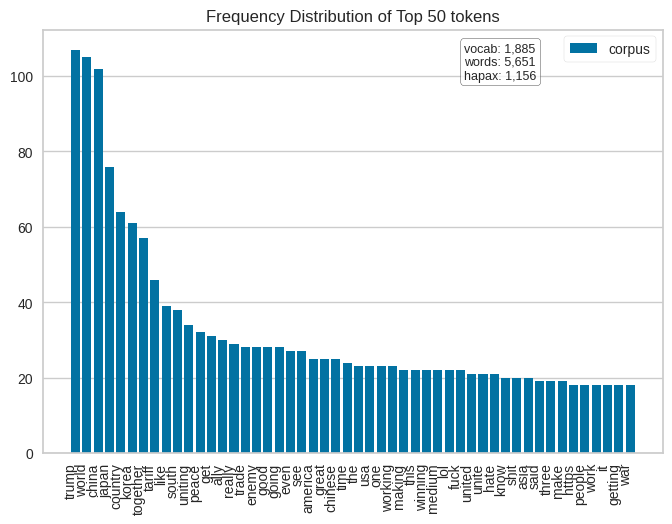

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


#1-gram
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

####**FREQ DIST OF TOP 50 TOKENS (2-GRAM)**

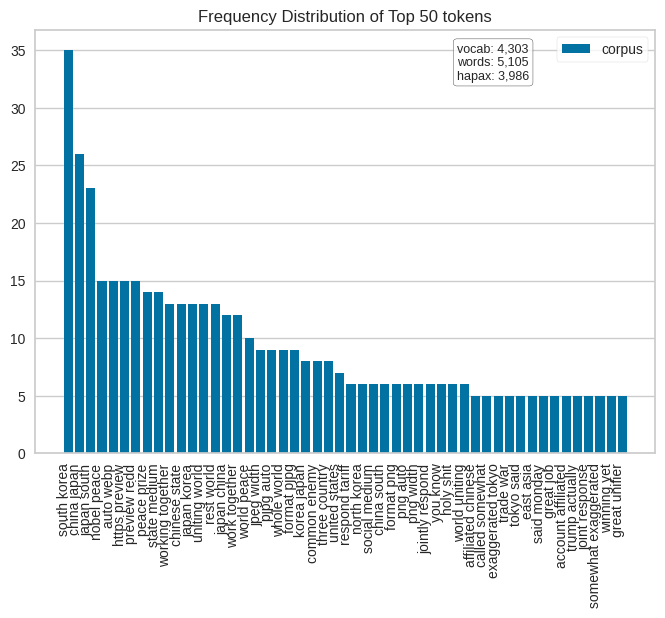

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
# 2-grams
vectorizer = CountVectorizer(ngram_range=(2,2))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()


####**FREQ DIST OF TOP 50 TOKENS (3-GRAM)**

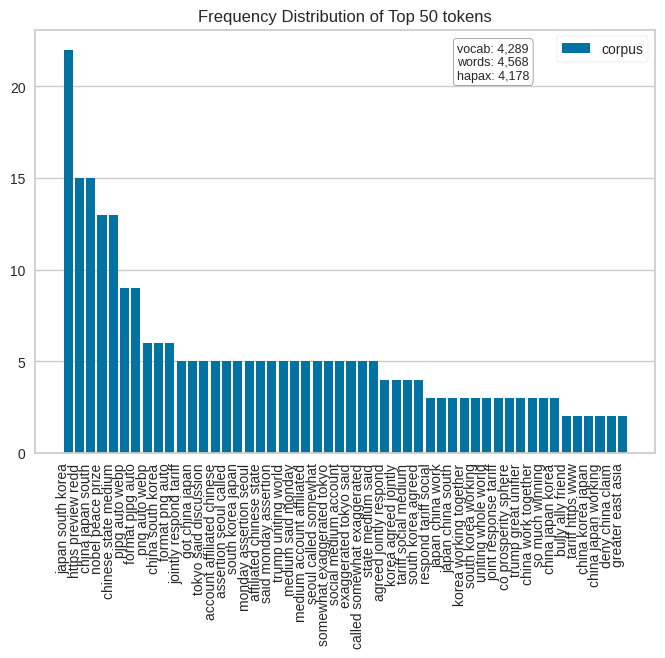

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
#3-grams
vectorizer = CountVectorizer(ngram_range=(3,3))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

####**FREQ DIST OF TOP 50 TOKENS (4-GRAM)**

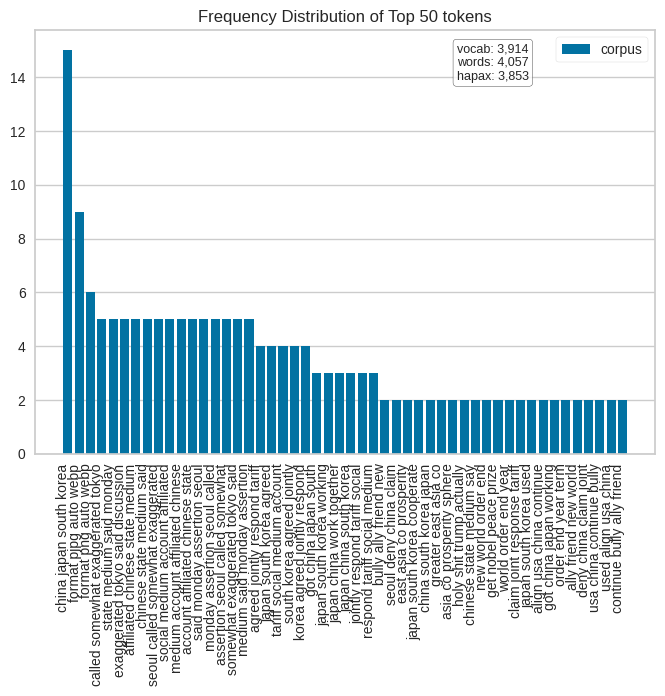

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [ ]:
#4-grams
vectorizer = CountVectorizer(ngram_range=(4,4))
docs = vectorizer.fit_transform(df['clean'])
features = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

### **Topic Modellng**
Topic modeling is a statistical model for discovering abstract topics.  The goal is to automatically determin the main themes in a set of documents.  Topic Modeling is an unsupervised machine learning technique and there are many Topic Modeling algorithms.

####**Topic Modeling (2-grams)**

done in 0.314s.


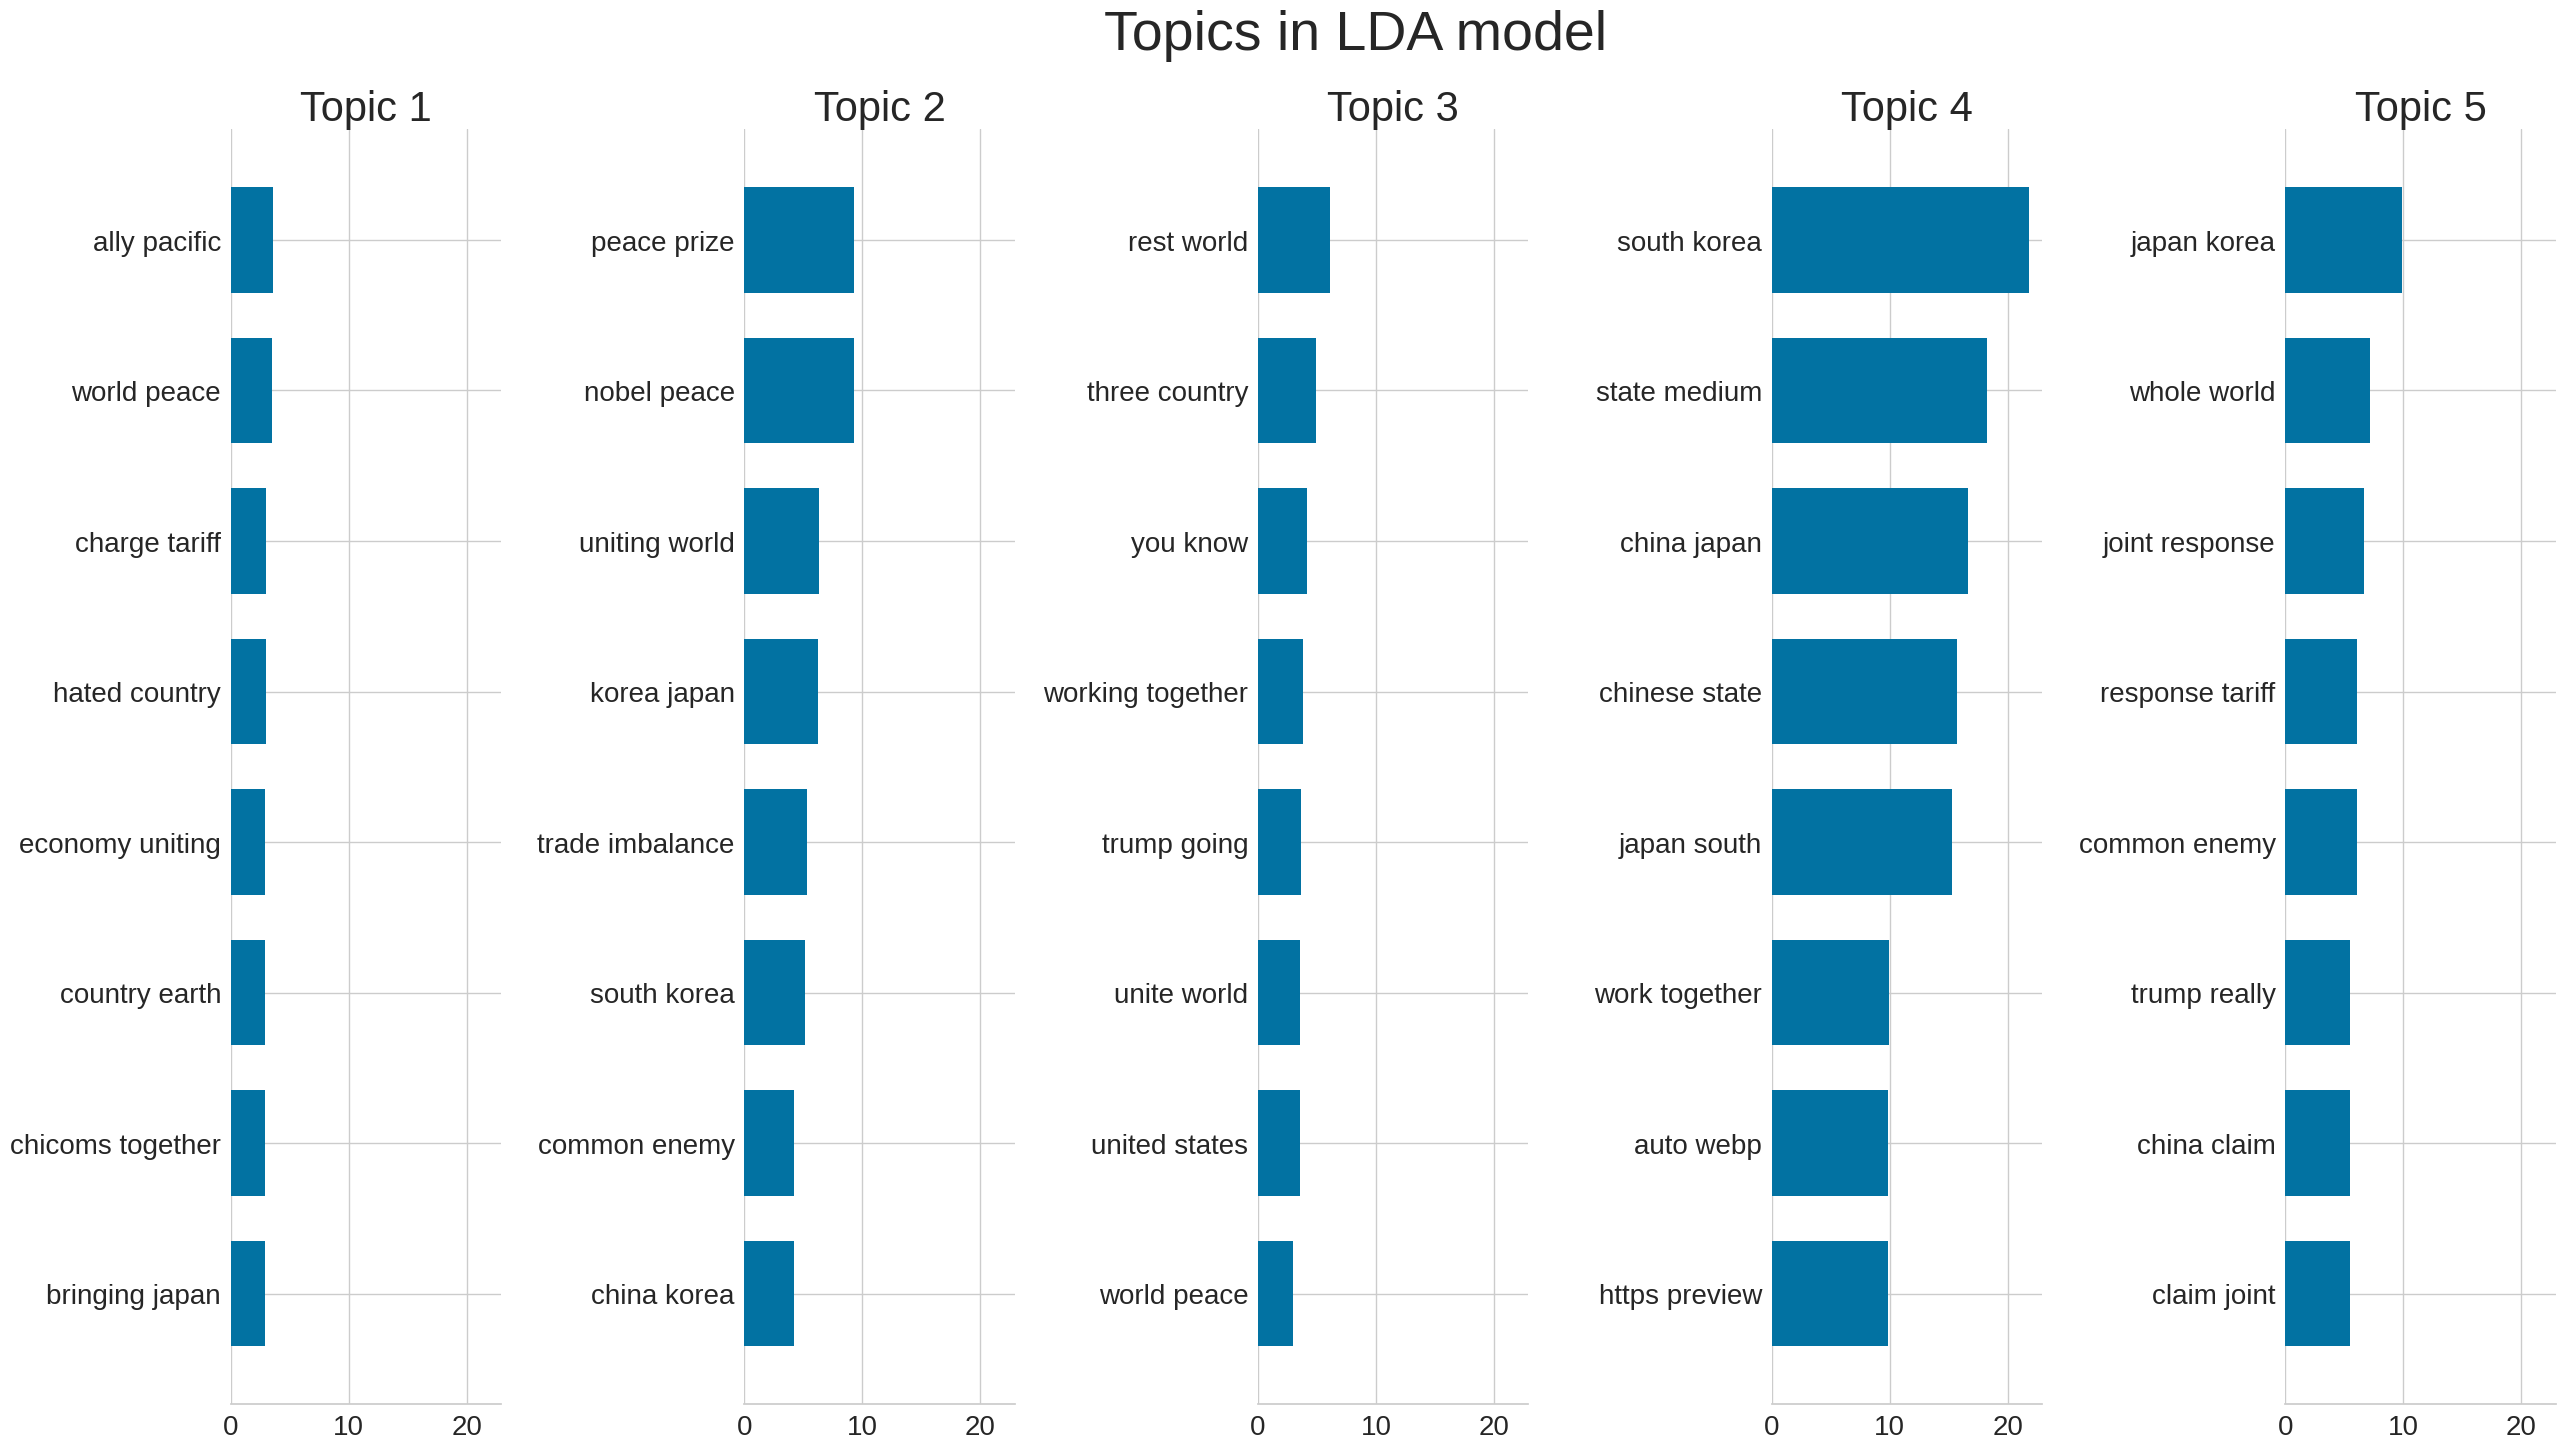

In [ ]:
import matplotlib.pyplot as plt
from time import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_samples = 3000
n_features = 2000
n_components = 5 # number of topics
n_top_words = 8  # number of topic words

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(2,2))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

####**Topic Modeling (5-grams)**

done in 0.244s.


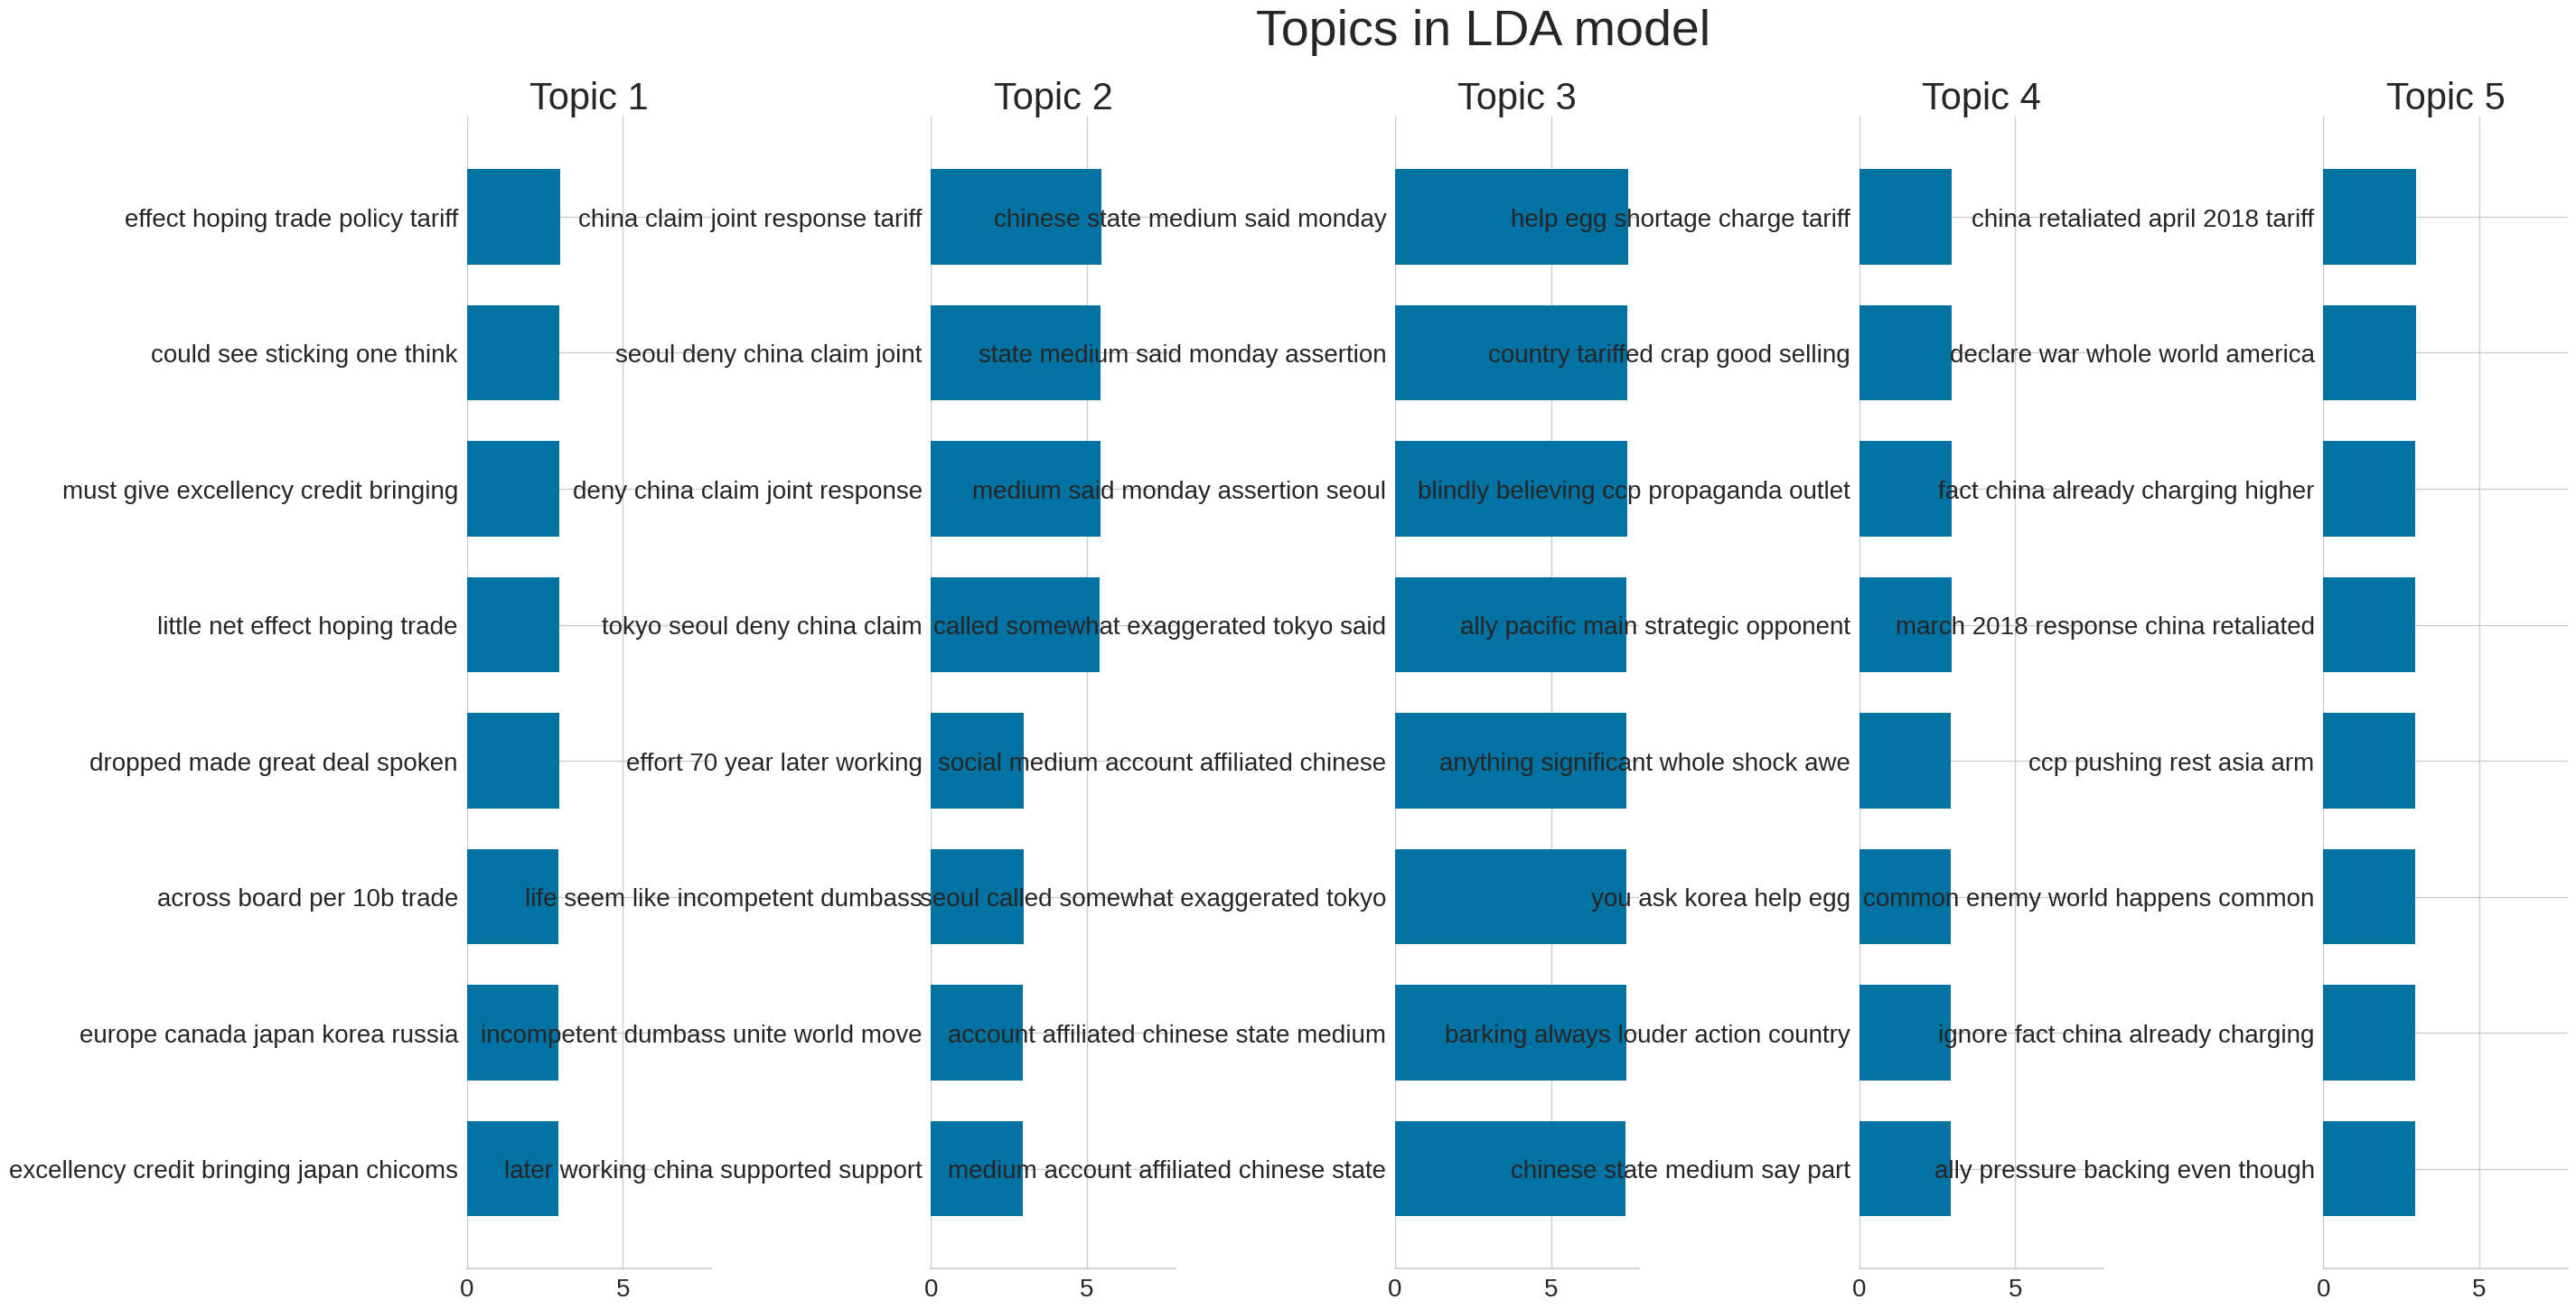

In [ ]:
n_samples = 3000
n_features = 2000
n_components = 5 # number of topics
n_top_words = 8  # number of topic words

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# here is how you can change whether to analyze one-gram, two-gram or three-gram
tf_vectorizer = CountVectorizer(max_features=n_features, ngram_range=(5,5))
dtm = tf_vectorizer.fit_transform(df['clean'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
t0 = time()
lda.fit(dtm)
print("done in %0.3fs." % (time() - t0))

plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')